<a href="https://colab.research.google.com/github/daryl-ramdin/inm707-daryl-ramdin/blob/main/atari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Packages

In [16]:
!pip install ray
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install "gymnasium[accept-rom-license]"
!pip install -U tensorboardx

import ray
import gymnasium 
import torch
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
                 
from ray.rllib.algorithms.dqn.dqn import DQNConfig
from ray.rllib.algorithms.ppo import PPOConfig
from ray.tune.logger import pretty_print
from ray import air, tune


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device('cuda')

print("Selected device:",device)

Selected device: cpu


2023-04-19 21:55:20,023	WARNING util.py:67 -- Install gputil for GPU system monitoring.


Epoch 0 Episode Mean Reward 1350.0 Duration(s) 8.016078
Epoch 1 Episode Mean Reward 1305.0 Duration(s) 29.726547
Epoch 2 Episode Mean Reward 1390.0 Duration(s) 28.253955
Epoch 3 Episode Mean Reward 1450.0 Duration(s) 26.674907
Epoch 4 Episode Mean Reward 1468.3333333333333 Duration(s) 27.25793
Epoch 5 Episode Mean Reward 1408.75 Duration(s) 29.427266
Epoch 6 Episode Mean Reward 1341.0 Duration(s) 29.849819
Epoch 7 Episode Mean Reward 1320.0 Duration(s) 30.41233
Epoch 8 Episode Mean Reward 1330.7692307692307 Duration(s) 30.759459
Epoch 9 Episode Mean Reward 1312.0 Duration(s) 29.659797
Epoch 10 Episode Mean Reward 1212.2222222222222 Duration(s) 28.9212
Epoch 11 Episode Mean Reward 1153.3333333333333 Duration(s) 29.651171
Epoch 12 Episode Mean Reward 1165.6521739130435 Duration(s) 30.12669
Epoch 13 Episode Mean Reward 1116.5384615384614 Duration(s) 29.964837
Epoch 14 Episode Mean Reward 1078.9655172413793 Duration(s) 30.266469
Epoch 15 Episode Mean Reward 1050.9375 Duration(s) 30.028741


2023-04-19 22:46:29,654	WARNING util.py:67 -- Install gputil for GPU system monitoring.


Epoch 0 Episode Mean Reward 1870.0 Duration(s) 5.023666
Epoch 1 Episode Mean Reward 1560.0 Duration(s) 30.782046
Epoch 2 Episode Mean Reward 1363.3333333333333 Duration(s) 31.730923
Epoch 3 Episode Mean Reward 1410.0 Duration(s) 30.312119
Epoch 4 Episode Mean Reward 1238.5714285714287 Duration(s) 29.433137
Epoch 5 Episode Mean Reward 1223.3333333333333 Duration(s) 29.962129
Epoch 6 Episode Mean Reward 1054.1666666666667 Duration(s) 32.375894
Epoch 7 Episode Mean Reward 960.6666666666666 Duration(s) 31.585818
Epoch 8 Episode Mean Reward 886.6666666666666 Duration(s) 32.154059
Epoch 9 Episode Mean Reward 857.1428571428571 Duration(s) 33.621817
Epoch 10 Episode Mean Reward 864.3478260869565 Duration(s) 31.460633
Epoch 11 Episode Mean Reward 858.4 Duration(s) 31.121522
Epoch 12 Episode Mean Reward 862.1428571428571 Duration(s) 31.546247
Epoch 13 Episode Mean Reward 852.6666666666666 Duration(s) 31.393667
Epoch 14 Episode Mean Reward 833.939393939394 Duration(s) 31.572059
Epoch 15 Episode M

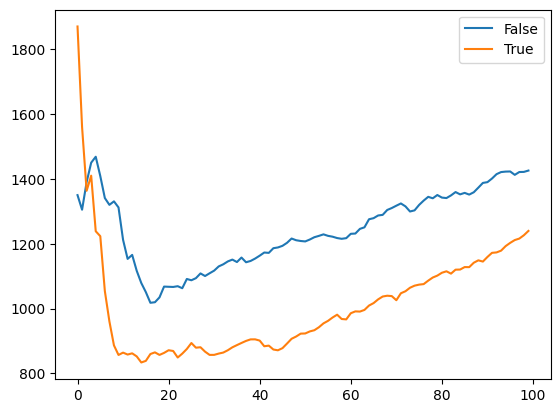

In [20]:
environ = "Riverraid-ramDeterministic-v4"
episodes = 200

config = DQNConfig()
config = config.environment(environ)
config.replay_buffer_config["capacity"] = 5000
config.double_q = True
if torch.cuda.is_available(): config = config.resources(num_gpus = 2)
config.replay_buffer_config["prioritized_replay"] = False
algo = config.build()

result = {}
logger1 = []
for i in range(episodes):
    start_time = datetime.now()
    results = algo.train()
    end_time = datetime.now()
    time_diff = end_time-start_time
    logger1.append([i,results["episode_reward_mean"],0])
    print("Epoch",i,"Episode Mean Reward",results["episode_reward_mean"], "Duration(s)",time_diff.total_seconds())

print("done")

config = DQNConfig()
config = config.environment(environ)
if torch.cuda.is_available(): config = config.resources(num_gpus = 2)
config.replay_buffer_config["prioritized_replay"] = True
config.replay_buffer_config["capacity"] = 5000
config.double_q = True
print(config.to_dict())
algo = config.build()

logger2 = []
for i in range(episodes):
    start_time = datetime.now()
    results = algo.train()
    end_time = datetime.now()
    time_diff = end_time - start_time
    logger2.append([i,results["episode_reward_mean"],0])
    print("Epoch",i,"Episode Mean Reward",results["episode_reward_mean"], "Duration(s)",time_diff.total_seconds())


#Calculate the cumulative average over the episodes
logger1 = np.array(logger1)
for i in range(len(logger1)):
    logger1[i][2] = sum(logger1[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward

logger2 = np.array(logger2)
for i in range(len(logger1)):
    logger2[i][2] = sum(logger2[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward
    
plt.plot(logger1[:, [0]], logger1[:, [1]], label="False")
plt.plot(logger2[:, [0]], logger2[:, [1]], label="True")
plt.legend()
plt.show()